<a href="https://colab.research.google.com/github/julianovale/PO240_Meta_heuristica/blob/main/PO240_Semana03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# rode esse código duas vezes
! pip install ortools

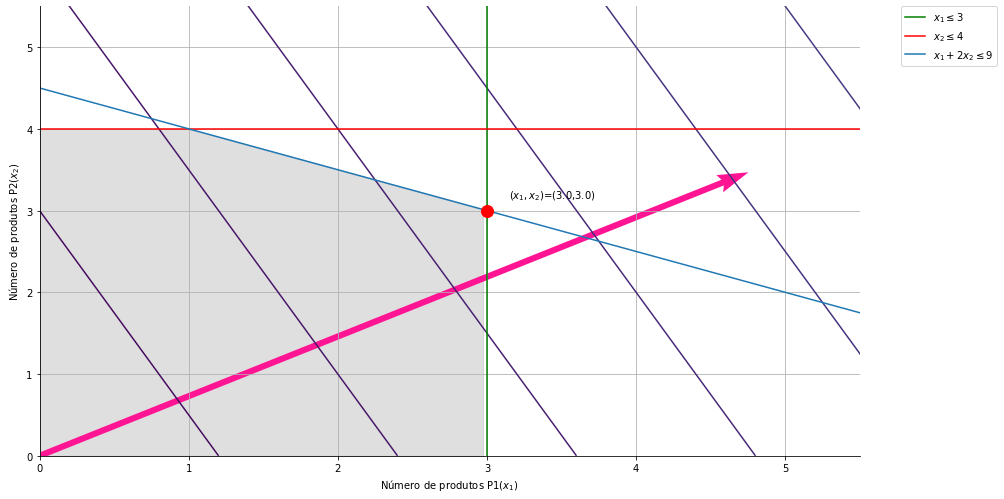

In [9]:
#@title Simulador do Plano de Produção {run: "auto"}

import numpy as np
import matplotlib.pyplot as plt
from ortools.linear_solver import pywraplp

def optmize(b1, b2, b3, c1, c2):
  
  pl = pywraplp.Solver('Plano de produção - PL', pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)
  
  # Variáveis de decisão:
  # na declação da variável eu já deixo a restrição de não negatividade: intervalo de 0 a infinito 
  x1 = pl.NumVar(0, pl.infinity(), 'x1')
  x2 = pl.NumVar(0, pl.infinity(), 'x2')

  # Restrições:
  # x1 <= b1:
  rest1 = pl.Constraint(-pl.infinity(),b1) # limites da restrição (ainda não pus os coeficientes): de -infinito a 3
  rest1.SetCoefficient(x1,1)
  rest1.SetCoefficient(x2,0)

  # x2 <= b2
  rest2 = pl.Constraint(-pl.infinity(),b2) # limites da restrição (ainda não pus os coeficientes): de -infinito a 3
  rest2.SetCoefficient(x1,0)
  rest2.SetCoefficient(x2,1)

  # x1 + 2*x2 <= b3
  rest3 = pl.Constraint(-pl.infinity(),b3) # limites da restrição (ainda não pus os coeficientes): de -infinito a 3
  rest3.SetCoefficient(x1,1)
  rest3.SetCoefficient(x2,2)

  # Função objetivo:
  obj = pl.Objective()
  obj.SetCoefficient(x1,c1)
  obj.SetCoefficient(x2,c2)
  obj.SetMaximization()

  # Manda resolver:
  pl.Solve()
  return pl, x1.solution_value(), x2.solution_value()

def grafico(b1, b2, b3, c1, c2, sx1, sx2):
  x1 = np.linspace(0,30,1000)
  x2 = np.linspace(0,30,1000)

  fig, ax = plt.subplots()
  fig.set_size_inches(14.7, 8.27)

  y0 = b1
  plt.axvline(b1, color='g', label='$x_1 \leq '+str(b1)+'$')
  y1 = b2
  plt.axhline(y1, color='r', label='$x_2 \leq '+str(b2)+'$')
  y2 = (b3/2) - (x1/2) # transforma x2 em função de x1
  plt.plot(x1,y2,label='$x_1 + 2x_2 \leq '+str(b3)+'$')


  plt.xlim(0,max(y0,b3/2+1))
  plt.ylim(0,max(y1,b3/2+1))
  plt.xlabel(r'Número de produtos P1($x_1$)')
  plt.ylabel(r'Número de produtos P2($x_2$)')
  plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
  plt.fill_between(x1, np.minimum(y2,y1), where=x1<=y0, color = 'gray', 
                  alpha = 0.25)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)

  fx1 = c1
  fx2 = c2
  ax.quiver(fx1,fx2,color='deeppink', scale_units='xy', scale=1)

  X1, X2 = np.meshgrid(x1, x2)
  Z = c1*X1+c2*X2
  plt.contour(X1, X2, Z, 40)

  plt.plot(sx1, sx2, color='red', marker='o', markersize=12)
  plt.text(sx1*1.05, sx2*1.05, '($x_1,x_2$)=('+str(sx1)+','+str(sx2)+')')

  plt.grid()
  plt.show()


b1 = 3#@param {type: "number"}
b2 = 4#@param {type: "number"}
b3 = 9#@param {type: "number"}

c1 = 5#@param {type: "number"}
c2 = 2#@param {type: "number"}

pl, sx1, sx2 = optmize(b1, b2, b3, c1, c2)
grafico(b1, b2, b3, c1, c2, sx1, sx2)